<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Statistics/Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

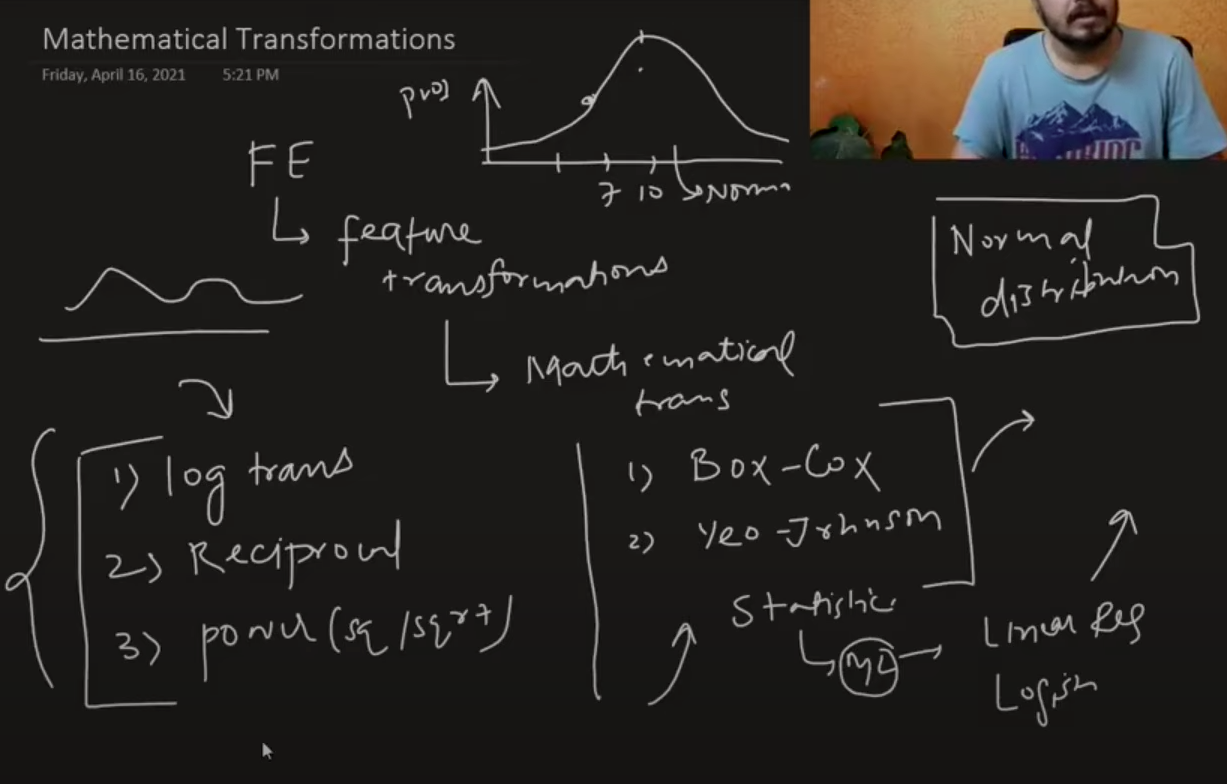

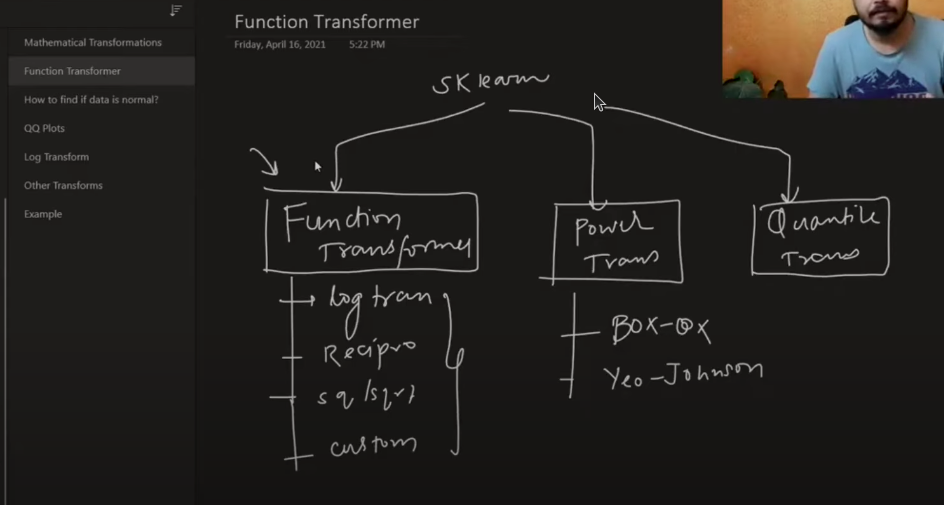

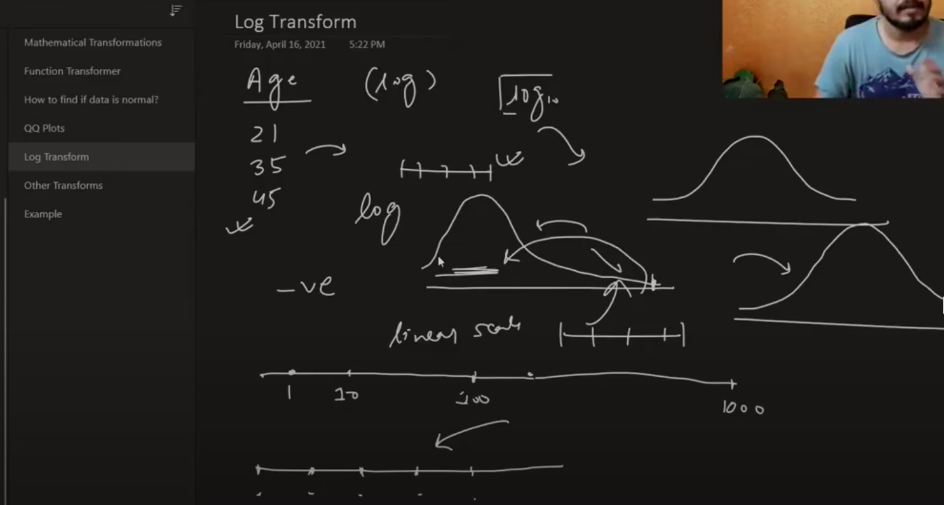

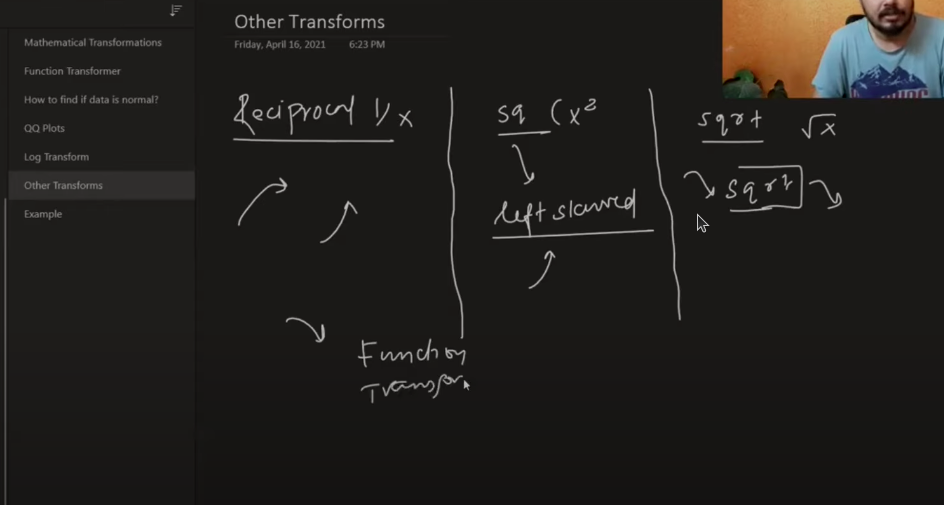

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
# Using titanic dataset I am using 3 columns Age, Fare, Survived
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [6]:
# Here I am filling the misisng values of Age with the mean od the Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)


/tmp/ipython-input-6-942003085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [9]:
# Here I am using column 1 and 2 as X or input and column 0 as ouput
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipython-input-11-1366822057.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


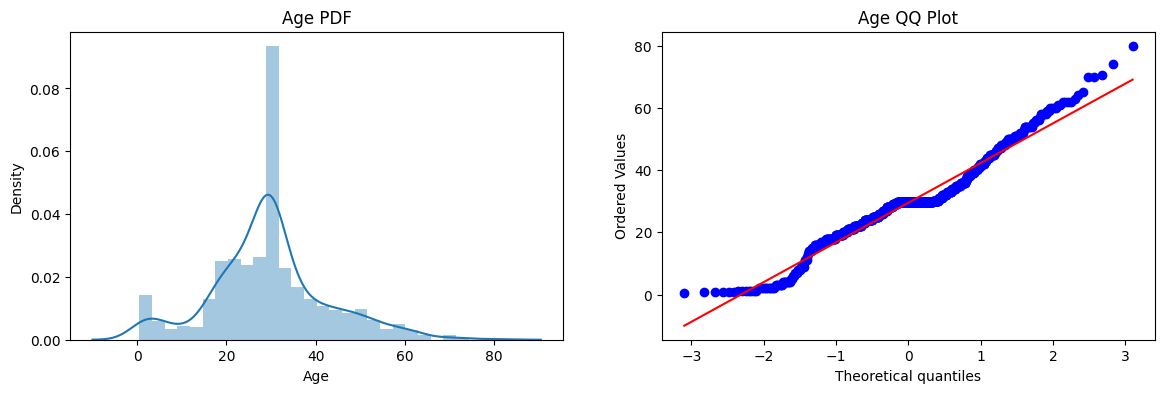

In [11]:
# Here I am visualising the pdf and QQ plot of Age column

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

Here we can Observe from the QQ plot that it is nearly normally distributes from either pdf and QQ plot as QQ plot doesn't show that much deviation from the straight line

/tmp/ipython-input-12-2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


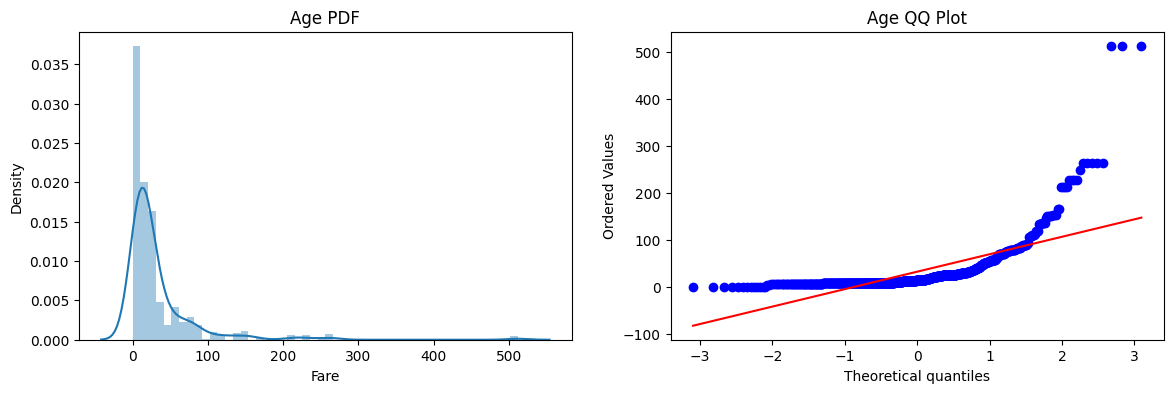

In [12]:
# Here I am visualising the pdf and QQ plot of Fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

Here we can Observe from the QQ plot that it is right skewed as the right tail of the blue curve is much more above the straight line and we know that if any distribution is right skewed then we use log Normal transformation , Now we will take the log of X and again plot the QQ plot to see if it will become normal dist or not

In [14]:
#  clf and clf2 are objects of LogisticRegression and DecisionTreeClassifier.

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

## ✅ `fit()` vs `fit_transform()`

### 🔹 `fit(X, y)`
- Used to **train models** like `LogisticRegression`, `DecisionTreeClassifier`, etc.
- The model **learns patterns** from the data.

### 🔹 `fit_transform(X, y)`
- Used with **transformers** like `StandardScaler`, `LabelEncoder`, etc.
- It **fits** the transformer and then **transforms** the data in one step.

---

### ⚠️ Why only `fit()` is used with models:
- `clf` and `clf2` are **models**, not transformers.
- Models are trained using `fit()`.
- Only transformers (not models) use `fit_transform()` to modify input data.

✅ Use `fit()` with models  
✅ Use `fit_transform()` with encoders/scalers



In [15]:
# Here first hum original data pe train krke accuracy nikal rhe hai and then after transforming the data in the next code line nikalenge

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


Function Transfromer ek class hai and uss class me se hum np.log1p function use kr rhe hai (i.e., log(1 + x)) to data.  ye better hai kyuki if agr aapke data me koi x 0 ho to x+1 zero nhi hoga. otherwise people also use np.logp

In [18]:
trf=FunctionTransformer(func=np.log1p)

In [22]:
X_train_transform=trf.fit_transform(X_train)
X_test_transform=trf.transform(X_test)

We haven't transform y as it is a classification problem and y is either 1 or 0

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred=clf.predict(X_test_transform)
y_pred1=clf2.predict(X_test_transform)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


Here we can clearly see that the accuracy of Linear Regression has been improved after transforming the data into normal distributuion.

But on the other we can't see any improvement in the DT.

**So the conclusion is distribution of the data affects the model like LR, logistic regression but not the models like Descision tress**

Applying Cross Validation

In [24]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6622347066167291


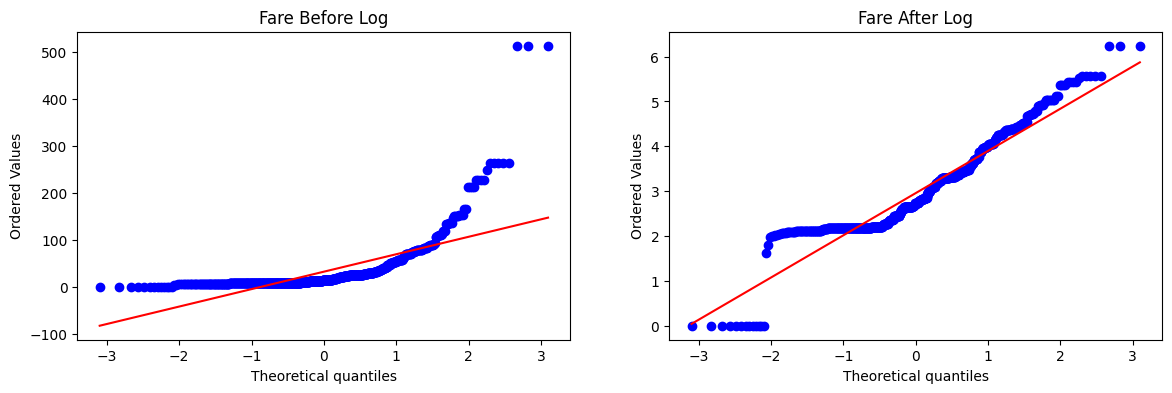

In [26]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

Here we can see that QQ plot of fare is now is more inclined to staright line which poves that applying log normal on the X['Fare'] is a good choice as it's distribution is showing normal distribution

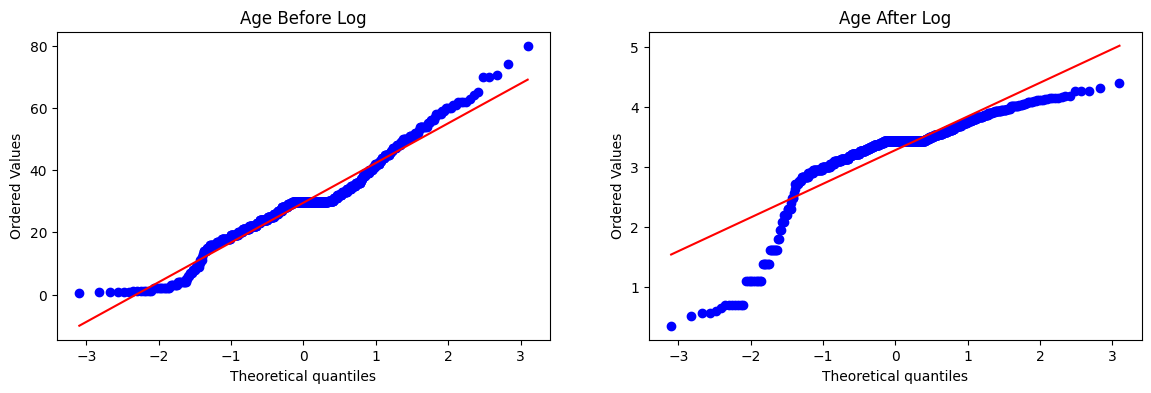

In [28]:

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

Here we can't say the same thing that I do for **Fare** as the QQ plot is more deviated from the normal dist. after taking logof X['Age'] as pehle wo jyada allign tha along normal dist.  so it will be better to just apply log norm on X['Fare'] not on  age column

In [29]:
# Here applying Log transform only on Fare not on Age and then train the model and find the accuracy

# Here we are using column transformer.
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [31]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588389513108613


In [34]:
# Here we have tried different types of transformation

# below is the general function which first define X,y and then using column Transformer it transform the Fare column making a clf object and then you can understand
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


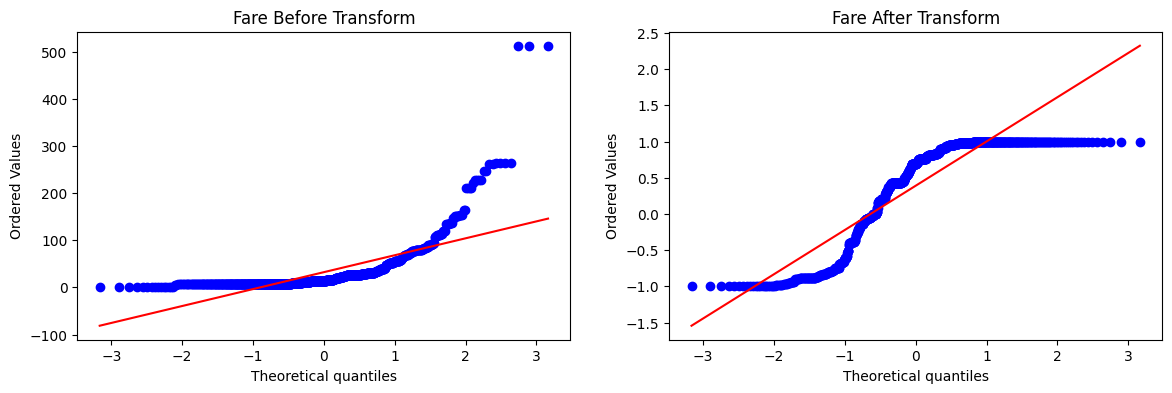

In [35]:
apply_transform(np.sin)